In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (12,8) # will adjust the configuration of the plots we will create

# read int the data
df = pd.read_csv('movies.csv')

In [ ]:
# Looking at the data
df.head()

In [ ]:
# identifying missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df = df.dropna()

In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [ ]:
# data type of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
df["yearcorrect"] = df["released"].astype(str).str[:4]
df.head()

In [ ]:
df.sort_values(by=["gross"], inplace= False, ascending = False)

#Scatter plot with budget vs gross

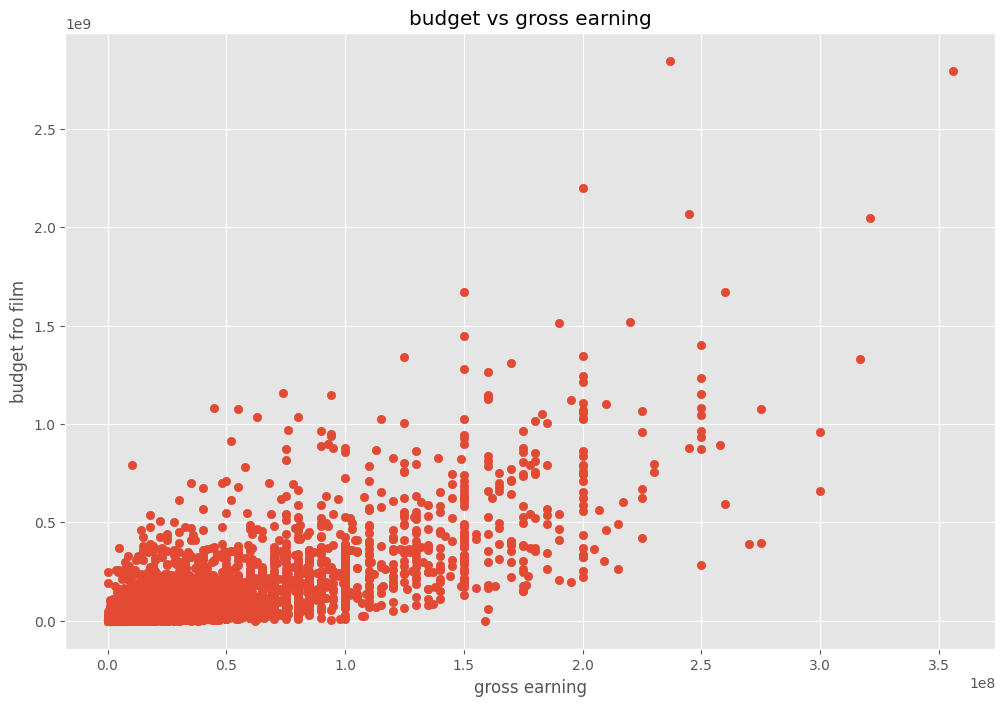

In [ ]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title("budget vs gross earning")
plt.xlabel("gross earning")
plt.ylabel("budget fro film")
plt.show()

# Regression plot budget vs gross using seaborn

<Axes: xlabel='budget', ylabel='gross'>

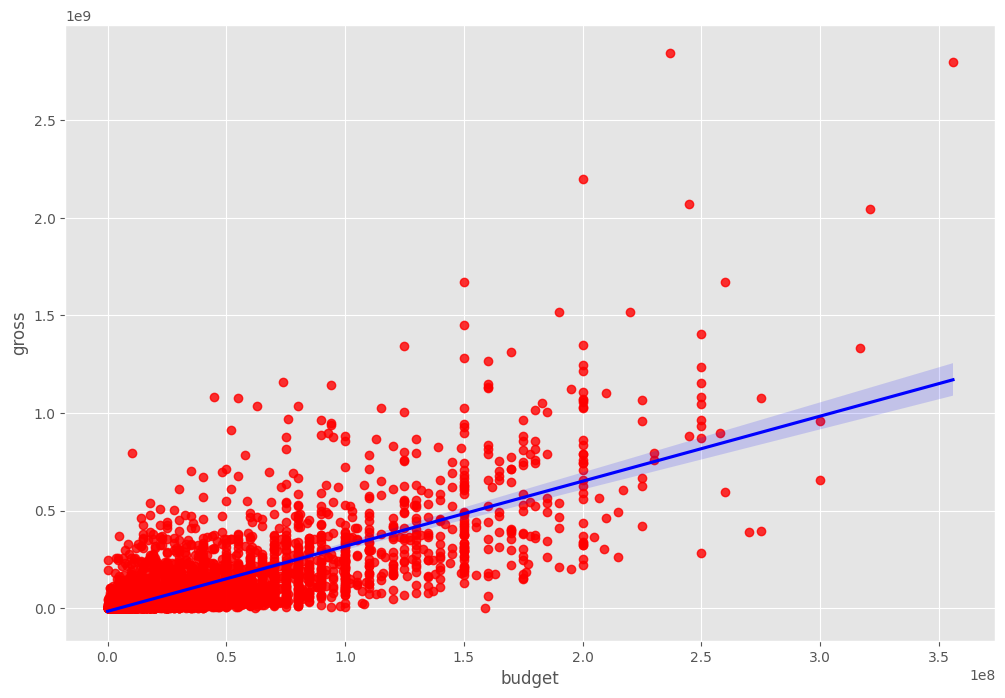

In [ ]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

# Identifying Relations

In [ ]:
df.corr(method = 'pearson')

<ipython-input-30-3a995beae43c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<ipython-input-32-9e5faa542755>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


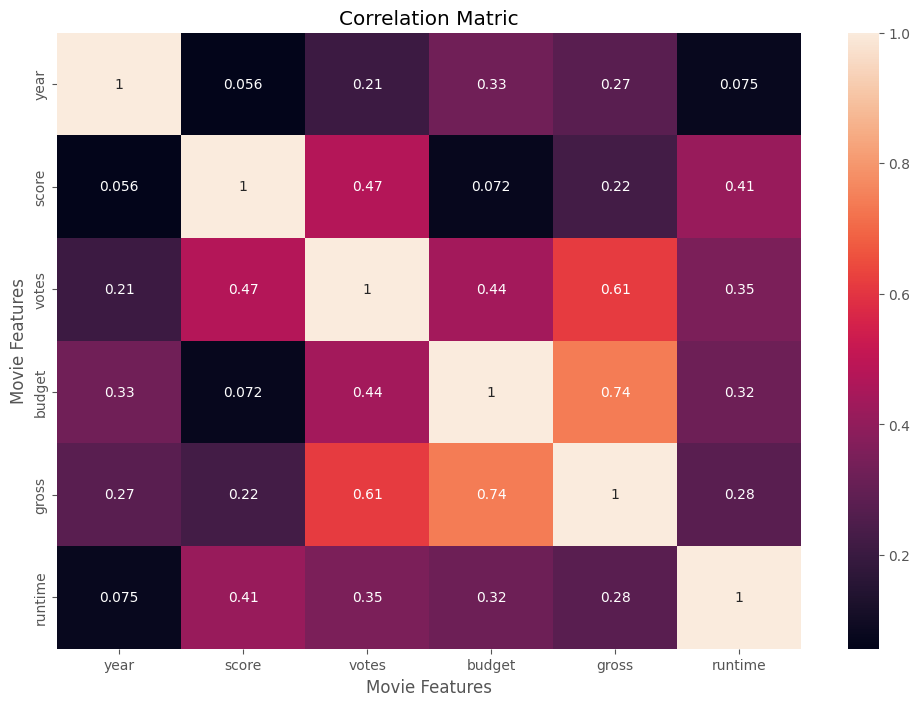

In [ ]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot =True)
plt.title("Correlation Matric")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

# converting company names from string to int


In [ ]:
df_num = df

for col_name in df_num.columns:
  if(df_num[col_name].dtype == 'object'):
    df_num[col_name] = df_num[col_name].astype('category')
    df_num[col_name] = df_num[col_name].cat.codes
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,11
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,10
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,11
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,10
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,10


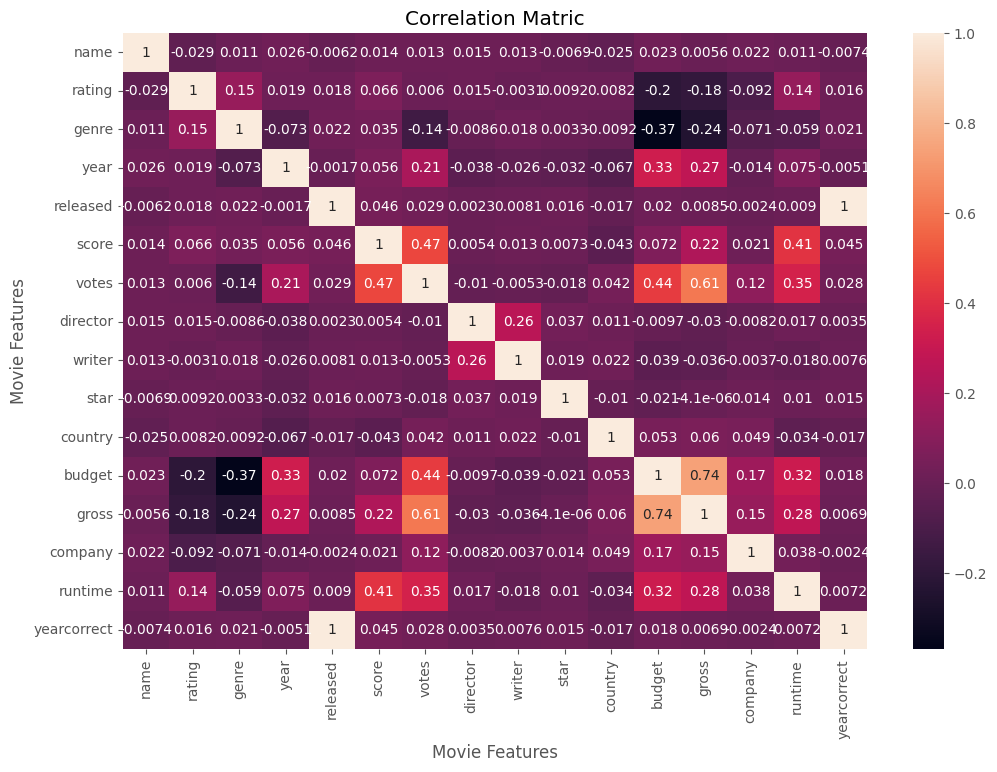

In [ ]:
correlation_matrix = df_num.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot =True)
plt.title("Correlation Matric")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [ ]:
correlation_mat = df_num.corr()
corr_pairs = correlation_mat.unstack()
sorted = corr_pairs.sort_values()
sorted

In [ ]:
high_corr = sorted[(sorted)>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       0.996181
released     yearcorrect    0.996181
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

we got to know the relationhip between the data which effect the movie's performance